## Import all Required Libraries

In [15]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

### Load the data into a Pandas DataFrame using read_csv function


In [16]:

data = read_csv('../Data/housingdata.csv')
print(data.head(5))

   area  bedrooms  bathrooms  stories  parking mainroad guestroom basement  \
0  7420         4          2        3        2      yes        no       no   
1  8960         4          4        4        3      yes        no       no   
2  9960         3          2        2        2      yes        no      yes   
3  7500         4          2        2        3      yes        no      yes   
4  7420         4          1        2        2      yes       yes      yes   

  hotwaterheating airconditioning prefarea furnishingstatus    price  
0              no             yes      yes        furnished  13300.0  
1              no             yes       no        furnished  12250.0  
2              no              no      yes   semi-furnished  12250.0  
3              no             yes      yes        furnished  12215.0  
4              no             yes       no        furnished  11410.0  


### Looking up the Data for Initial Understanding

In [17]:
print(data.shape)

(545, 13)


In [24]:
print(data.head(5))

   area  bedrooms  bathrooms  stories  parking  mainroad  guestroom  basement  \
0  7420         4          2        3        2         1          0         0   
1  8960         4          4        4        3         1          0         0   
2  9960         3          2        2        2         1          0         1   
3  7500         4          2        2        3         1          0         1   
4  7420         4          1        2        2         1          1         1   

   hotwaterheating  airconditioning  prefarea furnishingstatus    price  
0                0                1         1        furnished  13300.0  
1                0                1         0        furnished  12250.0  
2                0                0         1   semi-furnished  12250.0  
3                0                1         1        furnished  12215.0  
4                0                1         0        furnished  11410.0  


### 1. Develop a question of your choice that can be addressed by identifying, collecting, and analyzing relevant data. You need to find relevant data by yourself, and describe the data such as the source, attributes, size, how the data were collected, is the dataset sample data or population data?, etc. The dataset should have at least six distinct variables (i.e. columns) and a sample size (i.e. rows) of 500 or more. (3 points) 

### Answer:
Aim of the Analysis:
The goal is to build a model to predict the “the sale price of a house " (price). Based on different attributes in the dataset.and proposed way of Analysis is Linear Regression.
Each database record describes a house in the USA. The information was gathered in 1972 from the New York Standard Metropolitan Statistical Area. The following are the attributes:
price = sale price of a house in thousand dollars.
 area =  the total size of a property in square feet
 Bedrooms =  number of bedrooms
bathrooms =  number of bathrooms
stories = The number of stories excluding basement
mainroad = 1 if the house faces a main road
living room   = 1 if the house has a separate living room or a drawing room for guests
 basement =1 if the house has a basement
 hotwaterheating  = 1 if the house has hot water heating
 airconditioning    = 1 if there is central air conditioning
 parking = the number of parking spots
 prefarea = 1 if the house is located in the preferred neighbourhood of the city


Size of the data set.:
The dataset contains a sample size of 545,and 13 attributes, where price is Dependent variable, whereas the rest 12 are independent variables.


### Converting catrgorical Variables into float values,  replacing yes with1  and no  0 in our dataset

First of all using head() function we can see that there are columns with categorical values.
Our first task would be changing them into Numeric values.
As they are binary values, We use 1 for yes and 0 for no and replace the values in columns '    mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'.

In [18]:
categorical =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})


data[categorical] = data[categorical].apply(binary_map)

### adding a new column into table variable

In [19]:
table = pd.get_dummies(data['furnishingstatus'])   
table.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


### Recreate the table omitting the first column (furnished)

In [20]:
table = pd.get_dummies(data['furnishingstatus'], drop_first = True)  
table.head()


,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


### add the remaining two columns to our data set

In [12]:
data = pd.concat([data, table], axis = 1)  
data.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,price,semi-furnished,unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,furnished,13300.0,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,furnished,12250.0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,semi-furnished,12250.0,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,furnished,12215.0,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,furnished,11410.0,0,0


## Exploratory Data Analysis

2.Perform exploratory data analysis (EDA). Describe the EDA process and result with at least four data visualizations. Explain whether the data is sufficient to answer the question you developed based on the EDA result. If it is not sufficient, how did you address the issue? 
Exploratory Data Analysis (EDA) is a way of evaluating datasets in order to summarize their important features, which is frequently done using visual approaches. Before beginning the modeling work, EDA is used to see what the data can tell us.We are creating 4 visualizations to perform EDA.


In [11]:
print(data.dtypes)

area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
parking               int64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
prefarea              int64
furnishingstatus     object
price               float64
semi-furnished        uint8
unfurnished           uint8
dtype: object


## Histogram

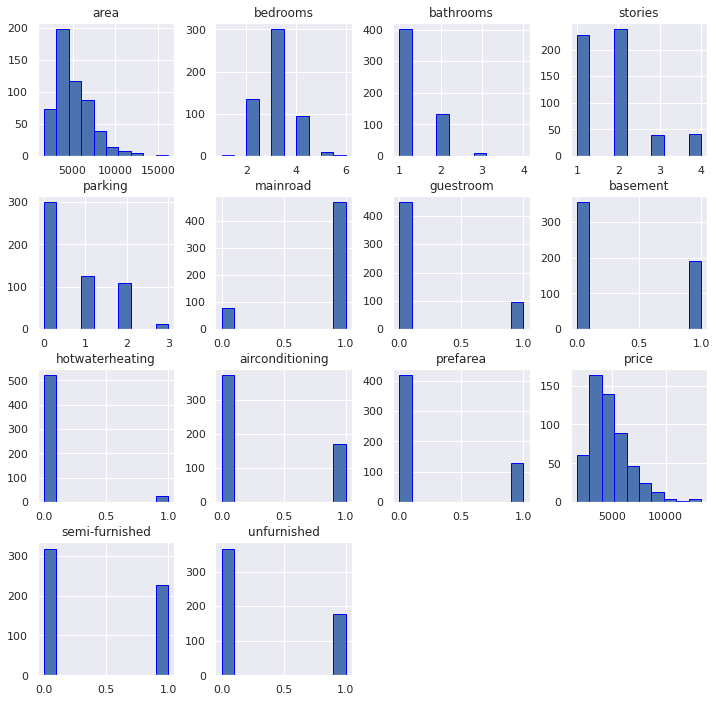

In [19]:
data.hist(edgecolor= 'blue',figsize=(12,12))
plt.show()

## Density Plot

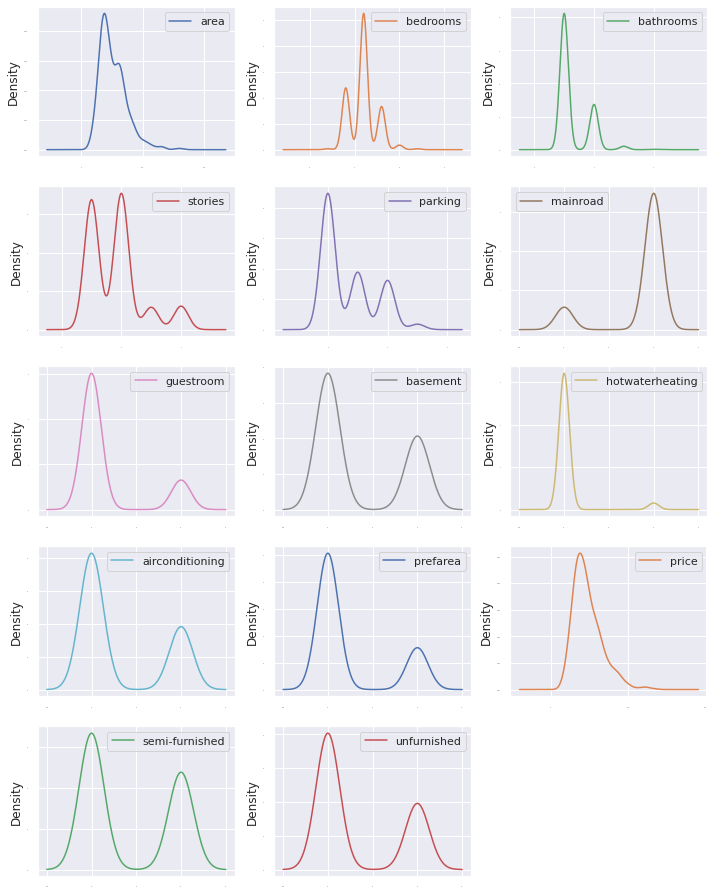

In [20]:
data.plot(kind='density', subplots=True, layout= (5,3), sharex=False, legend=True, fontsize=1, figsize= (12,16))
plt.show()

## Boxplot

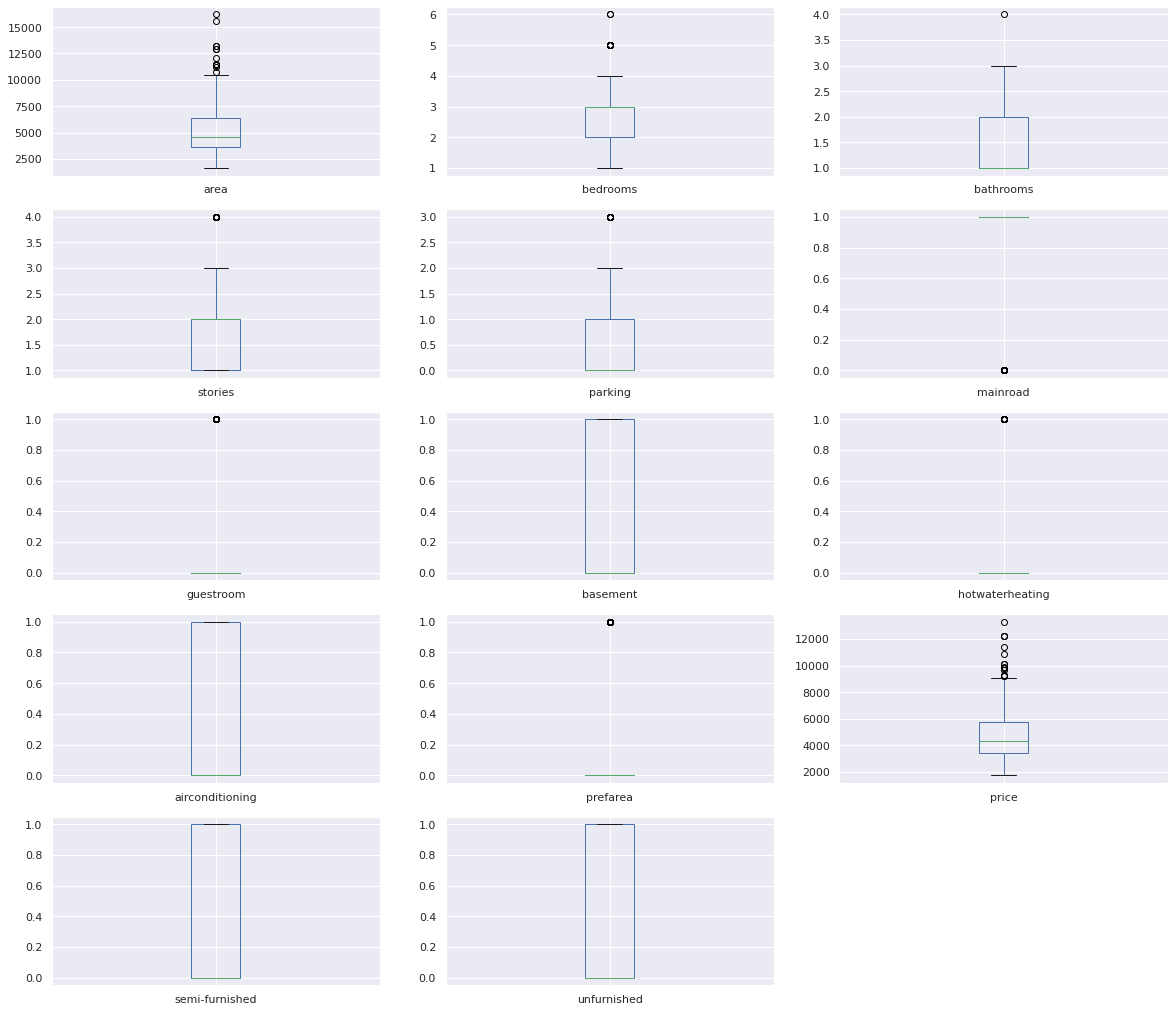

In [21]:
data.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

## Heatmap

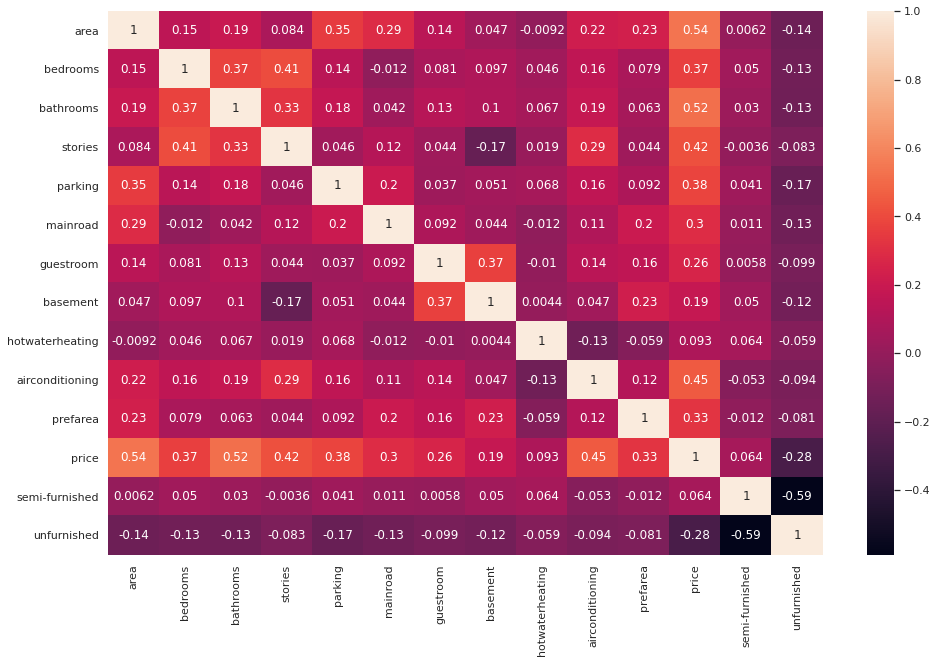

In [12]:
plt.figure(figsize =(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Pairplot

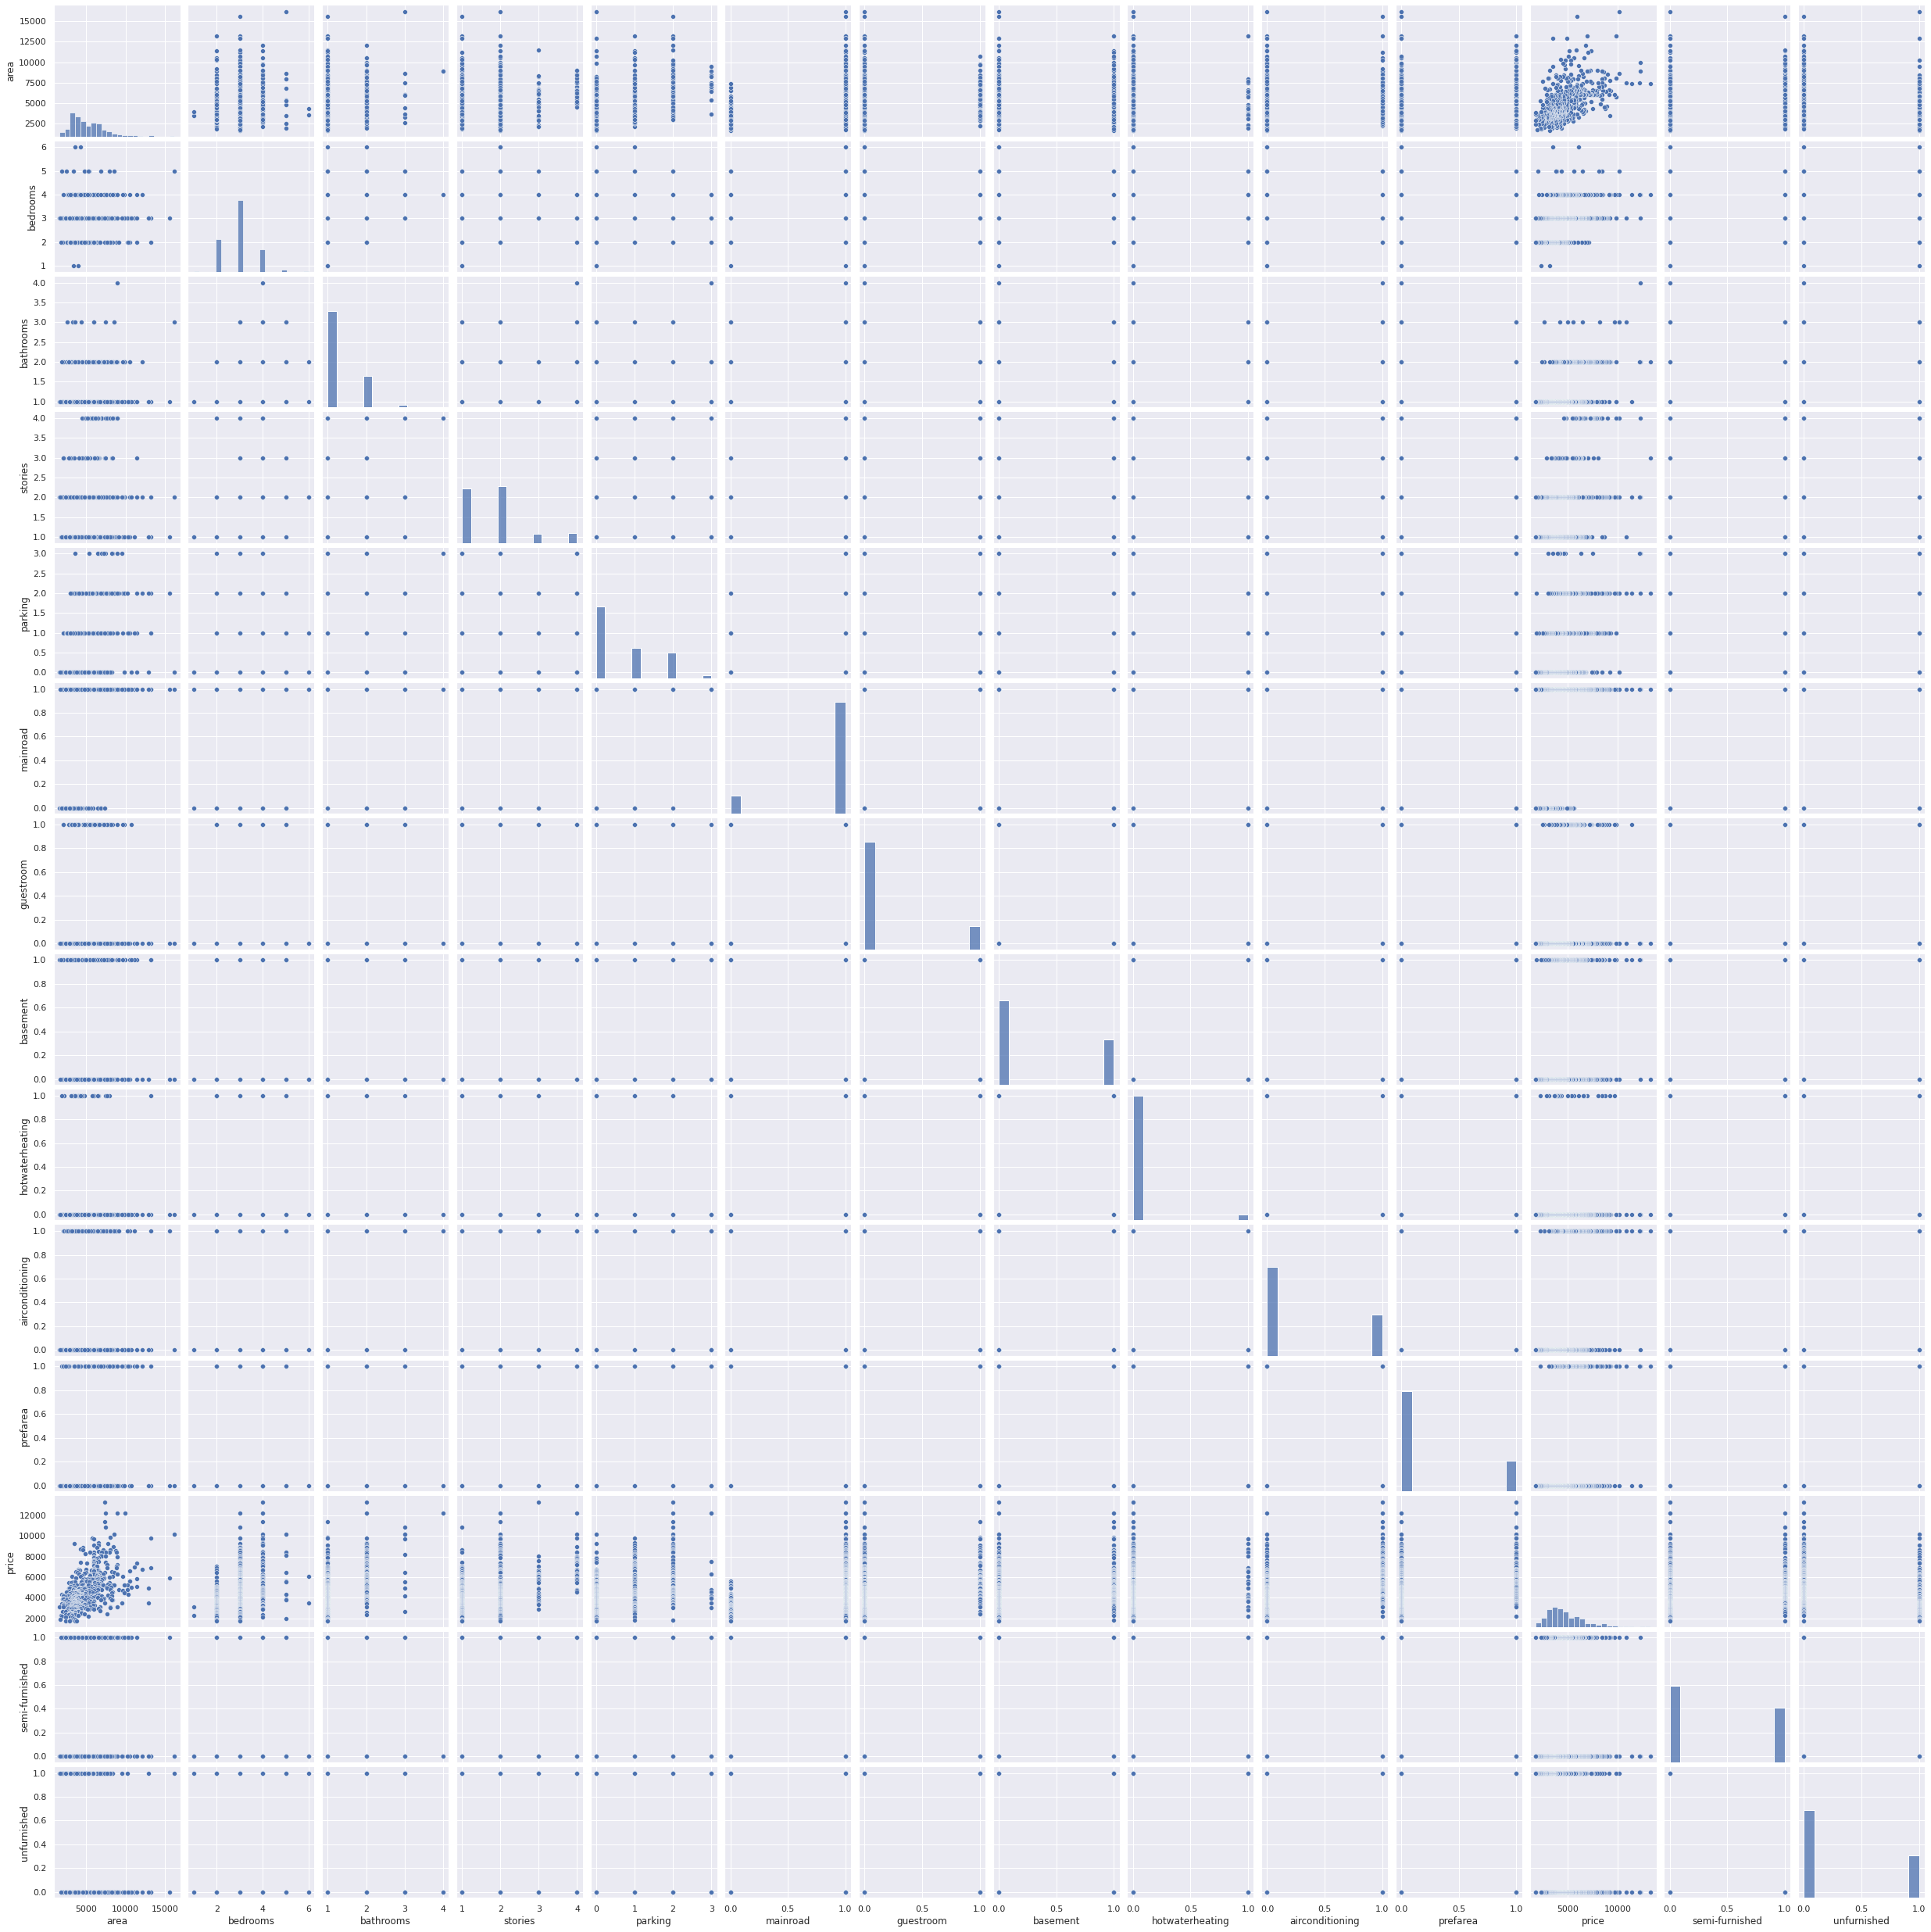

In [22]:
sns.pairplot(data)
plt.show()

### 2.Perform exploratory data analysis (EDA). Describe the EDA process and result with at least four data visualizations. Explain whether the data is sufficient to answer the question you developed based on the EDA result. If it is not sufficient, how did you address the issue? 

Exploratory Data Analysis (EDA) is a way of evaluating datasets in order to summarize their important features, which is frequently done using visual approaches. Before beginning the modeling work, EDA is used to see what the data can tell us.We are creating 4 visualizations to perform EDA.

We are using histograms, density plots, boxplots and heat maps for our EDA process.

Looking at the Histogram we can infer that the Data is not Normally distributed. Other than the binary variables, most of the attributes are skewed.
Here we are building a Heat map to describe the correlation between independent and dependent variables. From the results, we are going to select the top 4 most correlated variables to use in our model. with 1 being highly correlated. The heat map explains how all attributes are correlated to each other. Here for our Analysis, we only use correlations of independent variables with respect to dependent variables.
As we could see in the Heat map 'area','bedrooms','stories','parking' are highly correlated with 'price'. That is, a change in these values will have more effect on the dependent variable.


## Data Cleaning

### 3.Describe any data cleaning or transformations that you perform and why they are motivated by your EDA?
As we could see in the Heat map 'area','bedrooms','stories','parking' are highly correlated 'Price'. That is, a change in these values will have more  effect on the dependent variable.
If we look at the box plots of these Attribute Area have outliers.which may have caused the outliers in price as well.
We might have few missing values in the dataset.so we perform a data cleaning function where we replace missing values with zero. Though zero has a value in the columns with binary values, We are not considering them in building the model, so it won't affect                                             the model

In [13]:
no_missing = data.isnull().sum()
total_missing=no_missing.sum()
drop_miss_value=data.dropna(axis=1)
print(no_missing) 

area                0
bedrooms            0
bathrooms           0
stories             0
parking             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
prefarea            0
furnishingstatus    0
price               0
semi-furnished      0
unfurnished         0
dtype: int64


### exporting the cleaned dataset.
Please find cleaned dataset in attchment.

In [14]:
s=data
s.to_csv("cleaned_data.csv")

### Create a Subset with top 4 correlated variables

In [26]:
data1=data[['area','bedrooms','stories','parking','price']]

### SEPERATE THE DATASET INTO INPUT AND OUTPUT NUMPy ARRAYS by SLicing
 Where X are the independent variables and y is the value we are trying to predict

In [27]:
array = data1.values
X = array[:,:4]
Y = array[:,4]

### SPLIT THE INPUT/OUTPUT ARRAYS INTO THE TRAINING AND TESTING DATASETS
#### Using 67% data for training and rest 33% data for testing

In [28]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)


## Train the model using the training sub-dataset

In [44]:
model=LinearRegression()
model.fit(X_train, Y_train)
print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: 614.2979672007668
Coefficients: [3.24208055e-01 3.56164456e+02 4.71873645e+02 2.99902862e+02
 1.03396806e+03]


Model is built in the very first line of the code which is linear
regression and training values are given X_train Y_train using training sub
dataset. print function is used to model.intercept and model_coef.

### Calculate R-Squared

In [34]:
R_squared = model.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  0.5061411579134476


### We got a Calculated r Square value of 50%. The higher the R square the Better is the Model.The r squared values will tell us how well the independent variables can predict the dependent variables.


### predict function is used to predict from the training in the previous steps of code.

### When we input different values for Independent attributes, The system returns the price of a house in 1000 dollars.
#### Model Prediction 1:
#### Area = 725 Square feet
#### Bedrooms= 3
#### Stories = 5
#### Parking = 2



In [45]:
model.predict([[725,3,5,2]])

array([5910.98418438])

### The model predicted price of house to be in thousand dollars : 5910.98418438

#### Model Prediction 2:
#### Area = 1050 Square feet
#### Bedrooms= 2
#### Stories = 50
#### Parking = 1


In [46]:
model.predict([[1050,2,50,1]])

array([25560.63045134])

#### The model predicted price of house to be in thousand dollars : 25560.63045134

In [18]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

 ### must use the same seed value each time the operation is done in order to achieve the same subset Make folds in the entire data collection. To evaluate a linear regression model/algorithm, we can utilize the MSE (mean squared error) value.

In [ ]:
num_folds = 10
seed = 7
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -0.6514563649558609


### Evaluating Testing errors and Validation Errors

In [30]:
train_sizes = [15, 100, 250, 370, 410]

In [34]:
features = ['area','bedrooms','stories','parking']
target = 'price'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = data[features],
y = data[target], train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error') 

In [35]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70)
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[   -2330.56473525  -990131.3373536   -990131.3373536   -990131.3373536
   -990131.3373536 ]
 [ -112996.15061068 -1612123.29748033 -1612123.29748033 -1612123.29748033
  -1612123.29748033]
 [ -347776.69267102 -2209674.52513963 -1907655.63939841 -1864988.60761205
  -1864988.60761205]
 [ -537957.20481438 -2010577.68761257 -1971287.51947292 -1888234.43881324
  -1753830.10795903]
 [ -626541.34005243 -1966184.89774914 -1961478.23842666 -1917710.76420007
  -1769608.84444106]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -4988234.2589796  -16539612.36270208 -24124049.87957697
  -27655759.78514514 -34797009.68223039]
 [ -6462471.58483244  -4272104.86563312  -7647643.09545315
   -9698483.04337364 -13728686.51726231]
 [ -8905125.49425528  -1112642.08926455  -2084234.78304244
   -3235957.18138118  -5619840.46255721]
 [ -9622086.15049072  -1063921.13105076  -1220493.87431939
   -1532286.41075694  -3145085.12649468]
 [ -9712372

In [36]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 0)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20)
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 15     7.925712e+05
100    1.312298e+06
250    1.639017e+06
370    1.632377e+06
410    1.648305e+06
dtype: float64

 --------------------

Mean validation scores

 15     7.938058e+06
100    4.830059e+06
250    7.253174e+06
370    8.691019e+06
410    1.200170e+07
dtype: float64


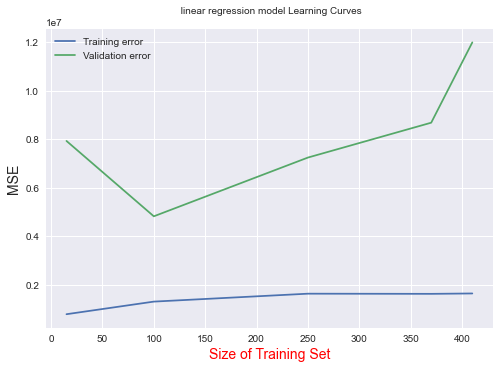

In [37]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Size of Training Set', fontsize = 14, color= 'Red')
plt.title(' linear regression model Learning Curves', fontsize = 10, y = 1.03)
plt.legend()


### We can observe that when the test size is 100, the loss function is minimal.


### K fold cross validation Using Variance

we must use the same seed value each time the operation is done in order to achieve the same subset Make folds in the entire data collection. To evaluate a linear regression model/algorithm, we can utilize the Explained Variance value.

In [ ]:

num_folds = 10
seed = 7
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
scoring = 'explained_variance'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: 0.11729918281675107


In [23]:
train_sizes = [15, 100, 250, 370, 410]

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
features = ['area','bedrooms','stories','parking']
target = 'price'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = data[features],
y = data[target], train_sizes = train_sizes, cv = 5,
scoring = 'explained_variance')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[0.36848975 0.39304986 0.39304986 0.39304986 0.39304986]
 [0.19070825 0.26307895 0.26307895 0.26307895 0.26307895]
 [0.22080203 0.44352972 0.36719137 0.28451792 0.28451792]
 [0.28013841 0.49324321 0.48750031 0.41213111 0.38786978]
 [0.30725196 0.51374479 0.51762998 0.46746003 0.40200101]]

 ----------------------------------------------------------------------

Validation scores:

 [[  0.0336734   -4.28711966 -16.65860946 -15.03418964  -1.47609902]
 [  0.09453918  -2.63949915 -11.08037814 -13.93779842  -1.52918663]
 [  0.09680773  -5.37685303 -13.51469663 -11.96575359  -1.57764522]
 [  0.13294914  -5.87779524 -16.98799533 -18.26232226  -1.98250515]
 [  0.15451472  -6.44666047 -19.05252927 -21.82795612  -2.05269016]]


In [26]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 0)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 15    -0.388138
100   -0.248605
250   -0.320112
370   -0.412177
410   -0.441618
dtype: float64

 --------------------

Mean validation scores

 15     -0.102497
100     4.925586
250    15.458842
370    16.205604
410     1.723625
dtype: float64


No handles with labels found to put in legend.


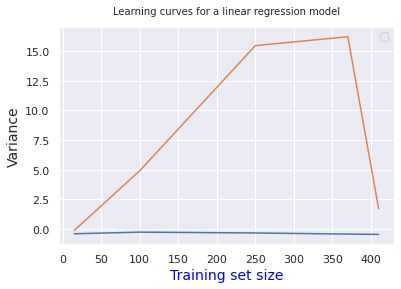

In [29]:
x = train_sizes 
x1 = train_scores_mean
y = train_sizes 
y1 = validation_scores_mean
plt.plot(x,x1)
plt.plot(y,y1)
plt.ylabel('Variance', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14, color= 'BLUE')
plt.title('Learning curves for a linear regression model', fontsize = 10, y = 1.03)
plt.legend()

### If we observe the graph plotting the test error and validation error using Variance as loss function.We can observe the test size,i.e. As n value increases variance decreases.


### 4. Apply relevant inference or prediction methods such as linear regression or K-nearest neighborhood (KNN) to analyze your processed data, and validate the analysis results using cross-validation. Explain the training process, and the loss functions used in the analysis. Using examples (i.e. the values of the loss functions) to explain how the minimal value(s) of the loss function is/are found. (7 points)

For this Dataset we are using Linear Regression.
We are creating a dataframe with only 4 independent variables we selected depending on the correlations and our dependent variable.
Now we split the data into test and training dataset, Using 67% data for Training and 33% of Data for Testing.
We got a Calculated r Square value of 50%. The higher the R square the Better is the Model.The r squared values will tell us how well the independent variables can predict the dependent variables.
When we input different values for Independent attributes, The system returns the price of a house in 1000 dollars.
Model Prediction 1:
Area = 725 Square feet
Bedrooms= 3
Stories = 5
Parking = 2
The model predicted price of house to be in thousand dollars : 5910.98418438

Model Prediction 2:
Area = 1050 Square feet
Bedrooms= 2
Stories = 50
Parking = 1
The model predicted price of house to be in thousand dollars : 25560.63045134

#### K-Fold Cross Validation And Loss Function:
Using 10 fold cross validation, we are measuring the loss function  mean square error. 
The Mean square error calculates the difference between the actual values and those predicted by the model.Our aim is to reduce the error.
In this model we got a mean square error value as 0.65.
MSE does not have a correct value. Simply simply, the lower the value, the better, and 0 denotes a perfect model. Because there is no such thing as a correct response, the MSE's primary use is to choose one prediction model over another.
And we obtained a Variance of 0.11.Variance is a measure of how far observed values deviate from the average of predicted values, or their difference from the predicted value mean, in linear regression. The goal is to achieve a low value.

Higher R square Means that the Independent and dependent variables are highly correlated, Higher the R square less are the Mean square error and Variance.


### Reducing the Loss Function:
The error (also known as "the loss") between the output of our algorithms and the supplied goal value is calculated using loss functions. The loss function, in simple terms, indicates how far our predicted output is off the mark.The model's accuracy is increased by minimizing the loss.
We can reduce Loss Function by 
1: Selecting suitable Variables:
We are selecting 4 highly correlated variables to build our model.
I have tried using 3 variables, it is overfitting the model and returning r square as 1.
If I try using 4 variables, the mean square error increases exponentially.
Hence using 4 variables was best suited to build this model and reduce loss function. 
And also if we observe the graph  plotting the test error and validation error using Mean square error as loss function.

We can observe in MSE Graph that when the test size is 100, the loss function is minimal.  If we observe the graph plotting the test error and validation error using Variance as loss function.We can observe the test size,i.e. As n value increases variance decreases.



### 5. Summarize and interpret your results including at least four data visualizations. Provide an evaluation of your approach and discuss any limitations of the methods you used.
We have built a model and predicted prices of houses providing different values to variables.
Model Prediction 1:
Area = 725 Square feet
Bedrooms= 3
Stories = 5
Parking = 2
The model predicted price of house to be in thousand dollars : 5910.98418438

Model Prediction 2:
Area = 1050 Square feet
Bedrooms= 2
Stories = 50
Parking = 1
The model predicted price of house to be in thousand dollars : 25560.63045134

R square value being 50% , which is small. It should be more than 85% to consider the value as good.
We are calculating average of variances and average of mean square errors.
We have lower values of  Mean Square Error and Variance, that indicates the model is Good.
The variance represents the range of a set of values, but the MSE represents the average of the squares of the "errors," or  in simpler terms it is the difference between the estimator and what is estimated.
### Limitations:
An essential aspect of the  Mean Square Error is that because the errors are squared, larger errors are given a much higher weight. As a result, a tenth-of-a-percentage-point error is 100 times worse than a one-percentage-point error.
The fact that Mean Squared Error and Variance are prone to outliers is one of their disadvantages. MSE is likewise prone to outliers because it employs the same idea of computing each error number using the mean. We understand that our population data may contain a few outliers. If we take even one such outlier into account while calculating our mean, there's a good probability it'll be a very large number. This can lead to higher errors.
